## Importing Relevant Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Loading And Exploring DataFrame

In [48]:
df = pd.read_csv('sweetspot_UT_Austin.csv')

In [34]:
df.head()

,Well Number,Well Name,Bottomhole X,Bottomhole Y,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
0,1,PO1_1,5064.04,13746.23,55.191600,1.617450e-04,0.128029,0.020377,0.020377,8551.7,157.119447,3,3491.971374,2992.403113
1,2,PO1_2,7668.40,13746.23,27.529400,1.394790e-04,0.101876,0.015088,0.015088,8579.9,69.831076,4,3501.327981,2947.374808
2,3,PO1_3,2459.67,13746.23,48.354000,1.973990e-04,0.119220,0.022396,0.022396,8557.1,134.781940,4,3493.763065,2904.053641
3,4,PO1_4,10272.76,13746.23,0.572057,1.440000e-07,0.064132,0.000091,0.000091,8635.5,1.101210,5,3519.775759,3301.826052
4,5,PO1_5,12877.11,13746.23,0.430394,8.560000e-08,0.063078,0.000067,0.000067,8718.6,0.435085,5,3547.347889,3365.597401


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well Number   55 non-null     int64  
 1   Well Name     55 non-null     object 
 2   Bottomhole X  55 non-null     float64
 3   Bottomhole Y  55 non-null     float64
 4   Co [MSTB]     55 non-null     float64
 5   Cw (bbl)      55 non-null     float64
 6   POROS         55 non-null     float64
 7   KX            55 non-null     float64
 8   KY            55 non-null     float64
 9   TD(MD)        55 non-null     float64
 10  Cg (mmcf)     55 non-null     float64
 11  FACIES        55 non-null     int64  
 12  P_2020-1-6    55 non-null     float64
 13  P_2029-1-1    55 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 6.1+ KB


In [50]:
df.drop(['Well Number','Well Name','Bottomhole X','Bottomhole Y'],axis=1,inplace=True)

#### Dropping unnecessary variables
"Well Number" and "Well Name" hold no significance to our variable analysis because they hold no physical meaning. 
The bottomhole locations will be significant in the future when we use Random Forests and Kriging methods, but they won't be of impact in our data analysis at this point either

In [55]:
df.describe()

,Co [MSTB],Cw (bbl),POROS,KX,KY,TD(MD),Cg (mmcf),FACIES,P_2020-1-6,P_2029-1-1
count,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,57.156812,5.165370e+00,0.135532,0.027481,0.022876,8539.674545,174.045430,3.000000,3487.981393,2790.943485
std,41.965628,1.810904e+01,0.039870,0.018500,0.018372,83.861334,159.318209,1.427248,27.824736,259.330503
min,0.000000,8.560000e-08,0.063078,0.000067,0.000067,8429.100000,0.000000,1.000000,3451.293359,2422.837662
25%,20.005750,1.088330e-04,0.103001,0.012782,0.006914,8474.800000,28.741417,2.000000,3466.456371,2569.341331
50%,47.893000,2.997180e-04,0.135415,0.027701,0.016377,8519.000000,134.781940,3.000000,3481.121691,2746.230378
75%,101.864950,4.928820e-04,0.172855,0.042156,0.038371,8597.800000,306.219399,4.000000,3507.267104,2973.260972
max,120.743000,9.260200e+01,0.190046,0.058184,0.058151,8775.700000,494.772320,5.000000,3566.293359,3365.597401


#### Intrerpretation
- We see non-negative values, which is a good sign of the quality of the dataset.
- Some production-based parameters have a minimum of zero (0), which implies that that specific well has not produced by the time of data collection.
- Porosity is expressed fractionally. It ranges between 6% and 19%.

In [57]:
df.isnull().sum()

Co [MSTB]     0
Cw (bbl)      0
POROS         0
KX            0
KY            0
TD(MD)        0
Cg (mmcf)     0
FACIES        0
P_2020-1-6    0
P_2029-1-1    0
dtype: int64

In [65]:
assert pd.notnull(df).all().all()
assert (df >=0).all().all()

#### Intrerpretation
- First command found no null values in our dataset.
- Second command didn't yield any error when looking for null or negative values.
  - This is an extra measure to validate there are no null nor non-physical values in our data.

### Porosity Study

In [84]:
por = df['POROS'].values
df['POROS'].describe()

count    55.000000
mean      0.135532
std       0.039870
min       0.063078
25%       0.103001
50%       0.135415
75%       0.172855
max       0.190046
Name: POROS, dtype: float64

#### Inter Quartile Range (IQR)

In [86]:
IQR = np.percentile(por,75) - np.percentile(por,25)
IQR

0.06985412699999999

#### Skewness 

In [92]:
df['POROS'].skew()

-0.25686095868936415

Skew is less than zero -> Negative Skew

Therefore, **Mean < Median < Mode**

We expect that there will be more extreme values on the lower end

/tmp/ipykernel_340/3130209476.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['POROS'])
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


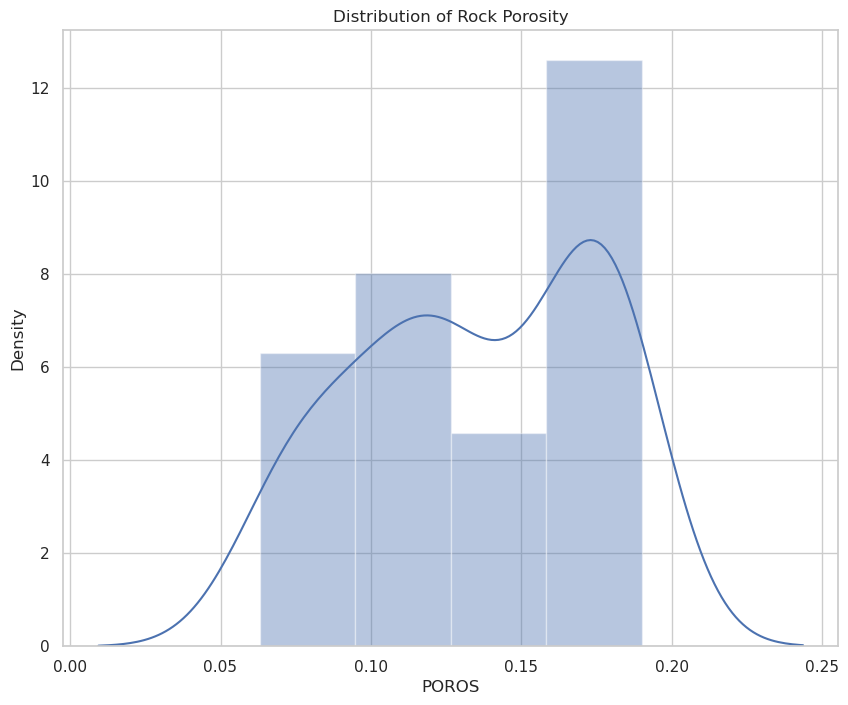

In [119]:
plt.figure(figsize= (10,8))
sns.distplot(df['POROS'])
plt.title("Distribution of Rock Porosity")
plt.show()

The above plot shows that there is a slight Negative skew in our Porosity Data

### General Distribution

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


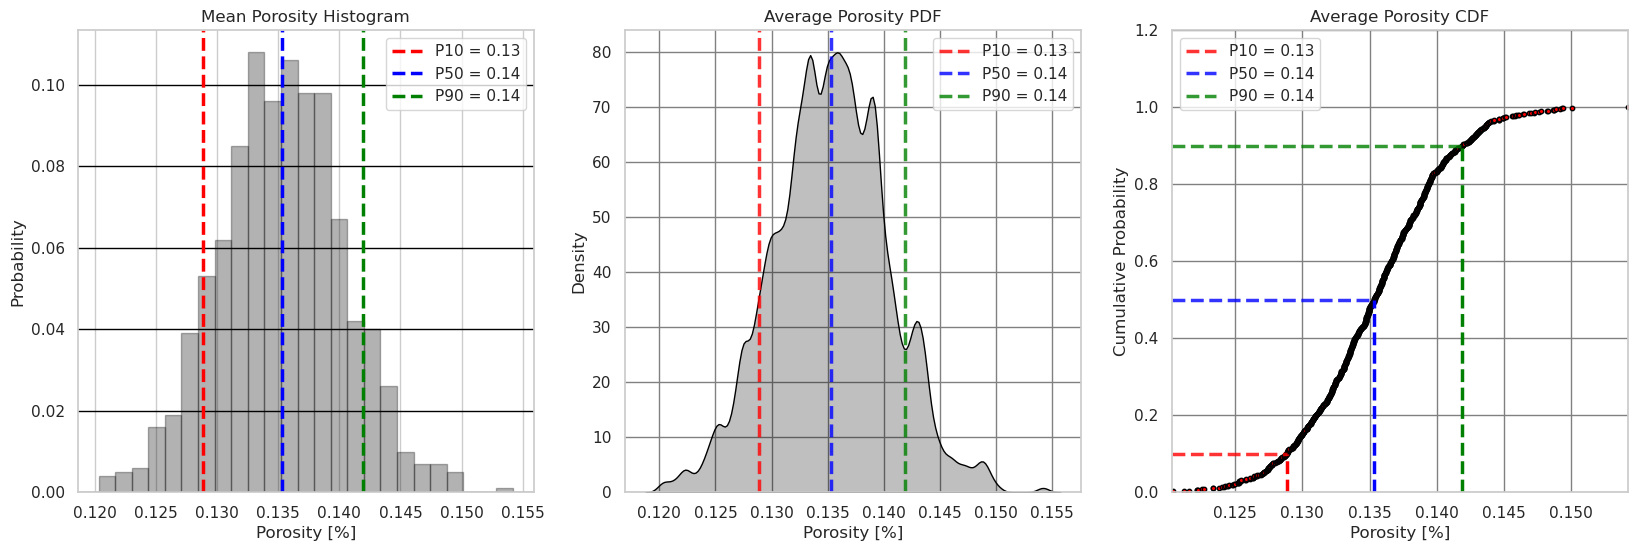

In [146]:
def bootstrap(realizations, dataset, statistic):
   
    resampled_data = np.zeros_like(dataset)
    bootstrapped_statistic = np.zeros(realizations)
    cprob = np.zeros(realizations)
    
    for i in range(len(bootstrapped_statistic)):
        for j in range(len(resampled_data)):
            resampled_data[j] = np.random.choice(dataset)
            j+=1
        bootstrapped_statistic[i] = statistic(resampled_data)
        index = i+1
        cprob[i] = index/len(cprob)
        i+=1
 
    plt.figure(figsize=(20,6))

    plt.subplot(131)
    plt.hist(bootstrapped_statistic, bins=25, alpha=0.3, color='black', edgecolor='black', range=[np.min(bootstrapped_statistic),np.max(bootstrapped_statistic)], 
             weights = np.ones(len(bootstrapped_statistic))/len(bootstrapped_statistic))
    plt.ylabel('Probability')
    plt.xlabel('Porosity [%]')
    plt.title('Mean Porosity Histogram')
    plt.grid(True, color='black', axis='y')
    plt.axvline(np.percentile(bootstrapped_statistic,10), color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}')
    plt.axvline(np.percentile(bootstrapped_statistic,50), color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}')
    plt.axvline(np.percentile(bootstrapped_statistic,90), color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}')
    plt.legend()
    
    plt.subplot(132)
    sns.kdeplot(bootstrapped_statistic, bw_method=0.1, fill=True, color='black')
    plt.grid(True, color='gray')
    plt.xlabel('Porosity [%]')
    plt.title('Average Porosity PDF')
    plt.axvline(np.percentile(bootstrapped_statistic,10), color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}', alpha = 0.8)
    plt.axvline(np.percentile(bootstrapped_statistic,50), color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}', alpha = 0.8)
    plt.axvline(np.percentile(bootstrapped_statistic,90), color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}', alpha = 0.8)
    plt.legend()
    
    plt.subplot(133)
    plt.scatter(np.sort(bootstrapped_statistic), cprob,  s = 10, color = 'red', edgecolor = 'black')
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,10)),(0.1,0.1),
             color='red', ls = '--', lw=2.5, label = f'P10 = {np.round(np.percentile(bootstrapped_statistic,10),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,10),np.percentile(bootstrapped_statistic,10)),(0,0.1), color='red', ls = '--', lw=2.5)
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,50)),(0.5,0.5),
             color='blue', ls = '--', lw=2.5, label = f'P50 = {np.round(np.percentile(bootstrapped_statistic,50),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,50),np.percentile(bootstrapped_statistic,50)),(0,0.5), color='blue', ls = '--', lw=2.5)
    plt.plot((np.min(bootstrapped_statistic),np.percentile(bootstrapped_statistic,90)),(0.9,0.9),
             color='green', ls = '--', lw=2.5, label = f'P90 = {np.round(np.percentile(bootstrapped_statistic,90),2)}', alpha = 0.8)
    plt.plot((np.percentile(bootstrapped_statistic,90),np.percentile(bootstrapped_statistic,90)),(0,0.9), color='green', ls = '--', lw=2.5)
    plt.grid(True, color='gray')
    plt.xlabel('Porosity [%]')
    plt.ylabel('Cumulative Probability')
    plt.title('Average Porosity CDF')
    plt.ylim([0,1.2])
    plt.xlim([np.min(bootstrapped_statistic),np.max(bootstrapped_statistic)])
    plt.legend(loc = 'upper left')

bootstrap(1000,por,np.average)

### Correlation Analysis

In [128]:
correlation = df.corr()
correlation['POROS'].sort_values(ascending=False)

POROS         1.000000
KX            0.951726
Cg (mmcf)     0.883273
KY            0.864681
Co [MSTB]     0.576293
Cw (bbl)     -0.005363
TD(MD)       -0.670178
P_2020-1-6   -0.670178
P_2029-1-1   -0.905485
FACIES       -0.972323
Name: POROS, dtype: float64

- There seems to be a strong positive correlation between Porosity and: Permeability in X and Y directions, as well as gas production
- Conversely, there seems to be a strong negative correlation between Porosity and the Facies of our field.
  - Could this indicate the increasing number in the Facies refers to tigther rocks with cementation and loss of effective porosity?

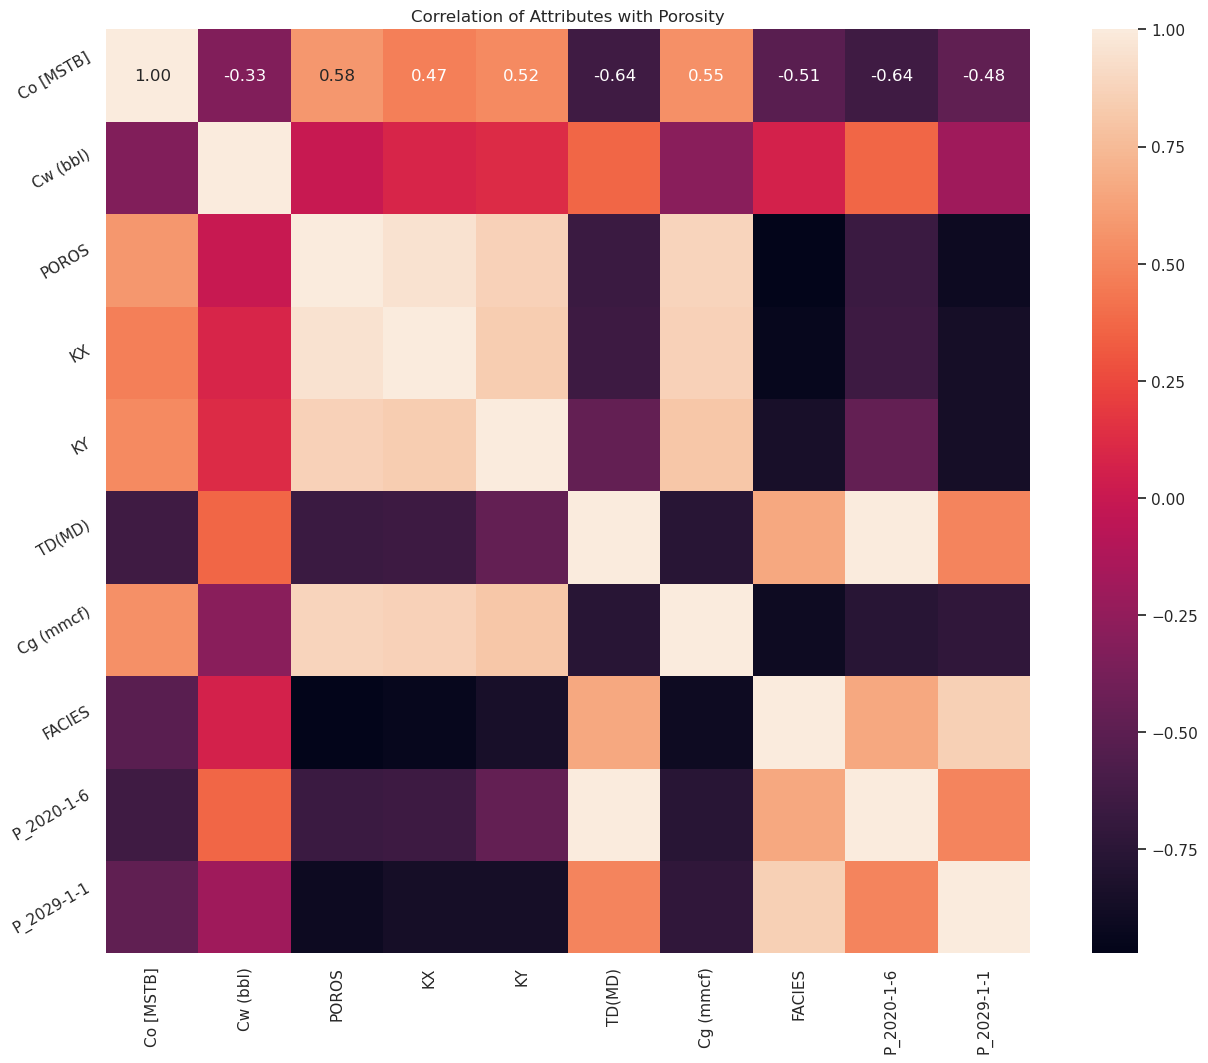

In [132]:
plt.figure(figsize=(16,12))
plt.title('Correlation of Attributes with Porosity')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()